In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.15.0'

In [0]:
!pip uninstall tensorflow

In [0]:
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10

#DATA PREPROCESSING

In [0]:
# load the cifar 10 dataset

# set class names in the dataset
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#Load the dataset
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [0]:
X_train

In [0]:
# image normalization
X_train = X_train/255.0

In [0]:
X_test = X_test/255.0 

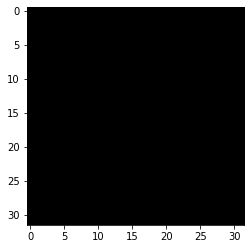

In [0]:
plt.imshow(X_test[10])

In [0]:
X_train.shape, X_test.shape # coloured images

((50000, 32, 32, 3), (10000, 32, 32, 3))

#BUILDING THE CNN

In [0]:
# define the model
model = tf.keras.models.Sequential()

# add first conv layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=[32,32,3]))

# add 2nd conv layer and max pooling layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# add 3rd conv layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# add 4th conv layer and max pooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2, padding='valid'))

# add the flattening layer
model.add(tf.keras.layers.Flatten())

# add first fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# add the output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

#COMPILING THE MODEL

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['sparse_categorical_accuracy'])
#categorical_accuracy checks to see if the index of the maximal true value is equal to the index of the maximal predicted value.
#sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

In [0]:
# train the model
model.fit(X_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 236s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.1006
Epoch 2/5
50000/50000 [==============================] - 240s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0980
Epoch 3/5
50000/50000 [==============================] - 236s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0999
Epoch 4/5
50000/50000 [==============================] - 234s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0973
Epoch 5/5
50000/50000 [==============================] - 234s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0977


In [0]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
test_loss, test_accuracy

(2.302640872955322, 0.1)

#HOMEWORK

In [0]:
# increase number of epochs from 5 to 15
model.fit(X_train, y_train, epochs=15)

Train on 50000 samples
Epoch 1/15
50000/50000 [==============================] - 232s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0984
Epoch 2/15
50000/50000 [==============================] - 233s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0980
Epoch 3/15
50000/50000 [==============================] - 232s 5ms/sample - loss: 2.3027 - sparse_categorical_accuracy: 0.1001
Epoch 4/15
50000/50000 [==============================] - 235s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0996
Epoch 5/15
50000/50000 [==============================] - 233s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0989
Epoch 6/15
50000/50000 [==============================] - 233s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0990
Epoch 7/15
50000/50000 [==============================] - 231s 5ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0974
Epoch 8/15
50000/50000 [==============================] - 231s 5ms/sample - loss: 2.3028

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
test_loss, test_accuracy

(2.302788332748413, 0.1)